In [22]:
# First getting the data sorted

In [23]:
# Targeted tusk to get the Status (1 = Cancelled, 0 = Not Cancelled)

# Features would Include Price, Quantity, Total Sales, time features, product/category/payment/customer location (one-hot encoded)

# Will Drop non-useful columns (IDs, raw date, customer name) [Make sure that it is safe for everyone]

# Date features by Order_Month, Order_Weekday

# Correlation heatmap will Show for insights

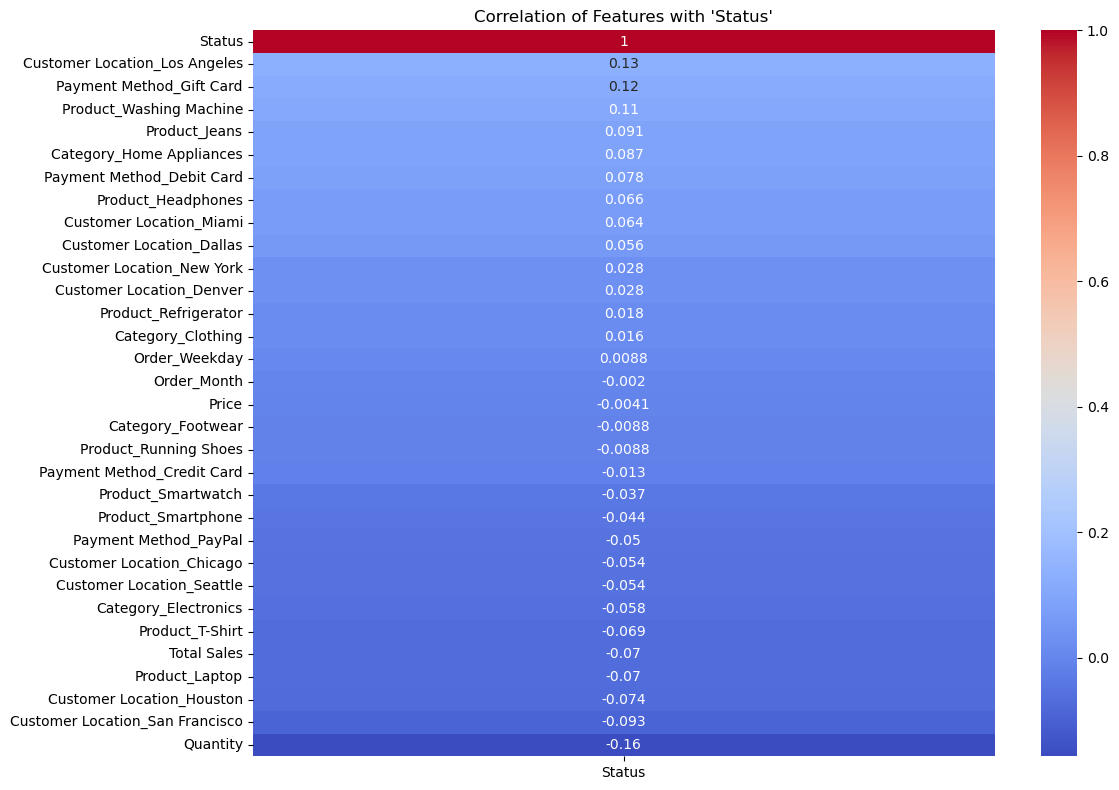

In [24]:
import pandas as pd

# Load the dataset again for notebook use
file_path = "amazon_sales_data 2025.xlsx"
df = pd.read_excel(file_path)

# Clean the target column: convert "Status" to binary (1 = Cancelled, 0 = Not Cancelled)
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)

# Convert Date Reworked to datetime and extract useful features
df['Date Reworked'] = pd.to_datetime(df['Date Reworked'])
df['Order_Month'] = df['Date Reworked'].dt.month
df['Order_Weekday'] = df['Date Reworked'].dt.weekday

# Drop unnecessary or personally identifiable columns
df_cleaned = df.drop(columns=['Order ID', 'Date', 'Date Reworked', 'Customer Name'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['Status'])
y = df_encoded['Status']

# Show cleaned feature set
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation heatmap to visualize important features
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr[['Status']].sort_values(by='Status', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with 'Status'")
plt.tight_layout()
plt.show()

#show data
# df_encoded.head(10)

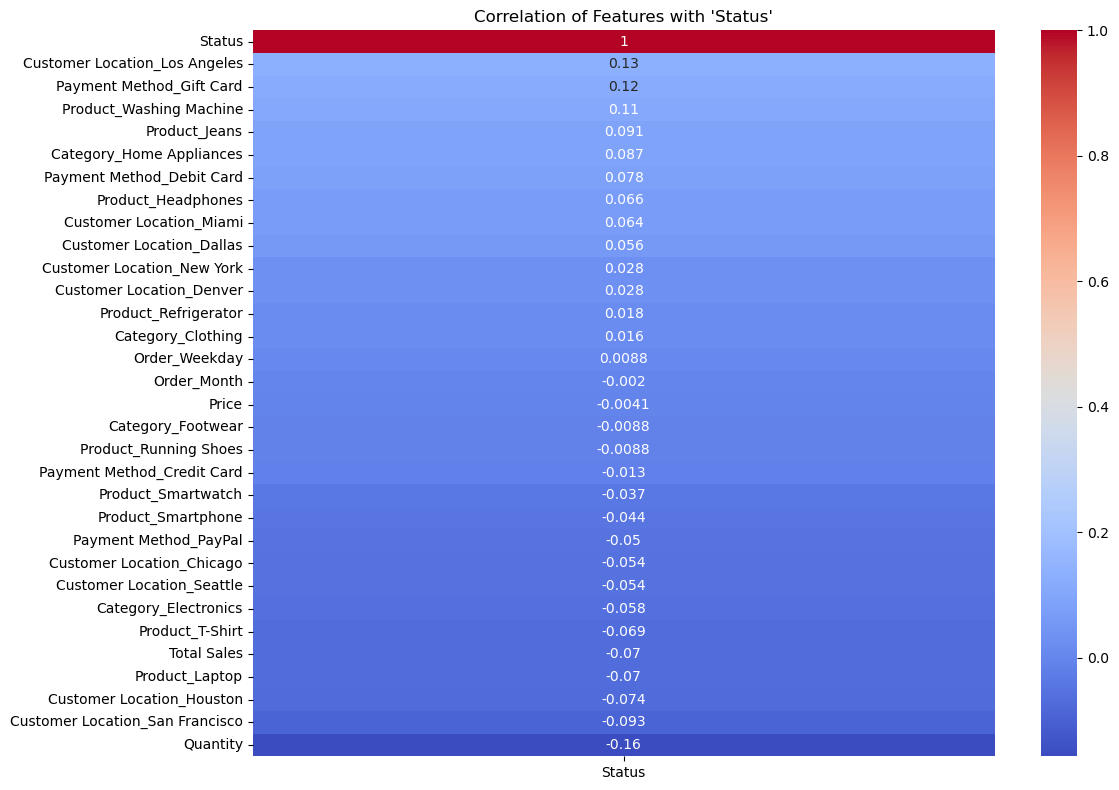

,Price,Quantity,Total Sales,Status,Order_Month,Order_Weekday,Product_Headphones,Product_Jeans,Product_Laptop,Product_Refrigerator,...,Customer Location_Houston,Customer Location_Los Angeles,Customer Location_Miami,Customer Location_New York,Customer Location_San Francisco,Customer Location_Seattle,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Gift Card,Payment Method_PayPal
0,60,3,180,1,3,4,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,100,4,400,0,3,3,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,60,2,120,1,2,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,60,3,180,0,2,2,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,150,3,450,0,10,0,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
5,20,1,20,0,3,4,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,150,4,600,0,3,1,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
7,500,1,500,0,8,3,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
8,20,3,60,0,1,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,500,1,500,1,11,0,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [25]:
# Re-import libraries after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset again
file_path = "amazon_sales_data 2025.xlsx"
df = pd.read_excel(file_path)

# Clean the target column: convert "Status" to binary (1 = Cancelled, 0 = Not Cancelled)
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)

# Convert Date Reworked to datetime and extract useful features
df['Date Reworked'] = pd.to_datetime(df['Date Reworked'])
df['Order_Month'] = df['Date Reworked'].dt.month
df['Order_Weekday'] = df['Date Reworked'].dt.weekday

# Drop unnecessary or personally identifiable columns
df_cleaned = df.drop(columns=['Order ID', 'Date', 'Date Reworked', 'Customer Name'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['Status'])
y = df_encoded['Status']

# Correlation heatmap to visualize important features
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr[['Status']].sort_values(by='Status', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with 'Status'")
plt.tight_layout()
plt.show()

#show data
df_encoded.head(10)


In [26]:
# Training the first Machine learinging model with Random Forest classifier model with scikit-learn

In [27]:
# Things to do:

# 1. Split the dataset into training and testing sets
#2. Train a Random Forest Classifier using scikit-learn
# 3. Evaluate it using:
# 4. Accuracy
# 5. Confusion Matrix
# 6. ROC Curve ----required
#7. AUC Score ----Required
# 8. Extract and show feature importance (hopefully it is working)

<Figure size 800x600 with 0 Axes>

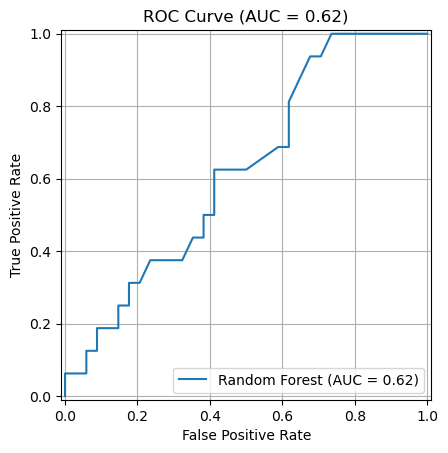

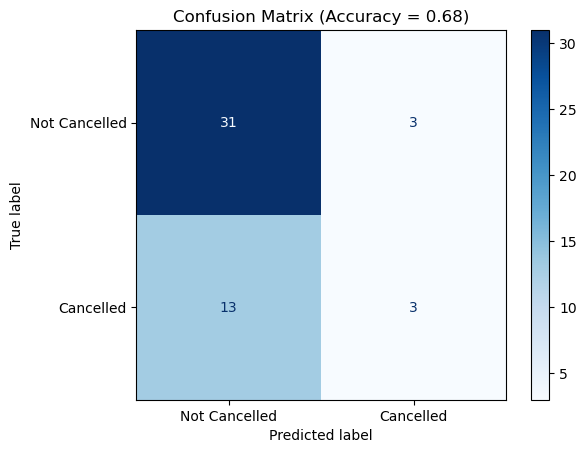

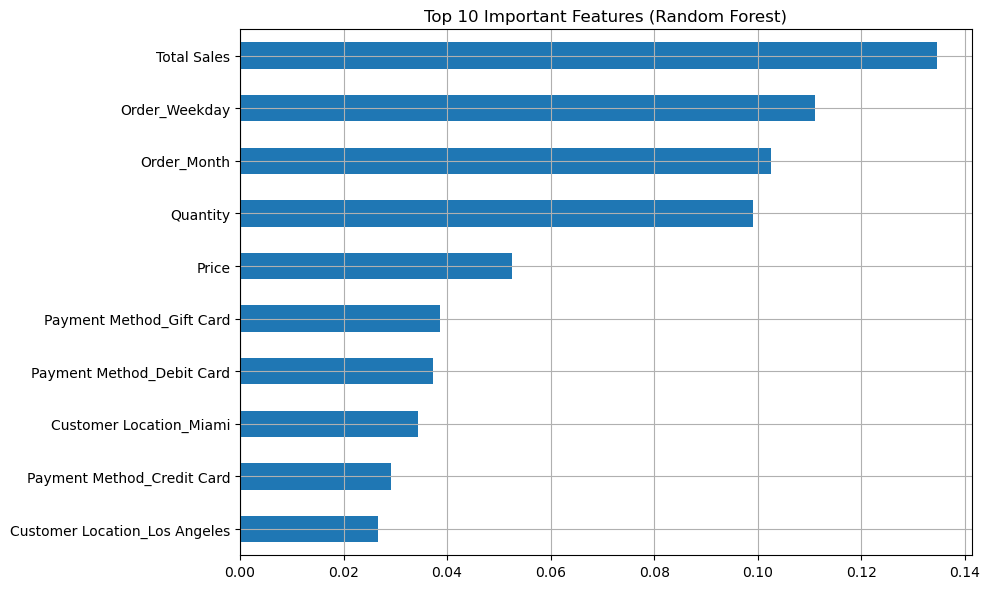

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
)

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Step 4: Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.2f})")
plt.grid(True)
plt.show()

# Plot Confusion Matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=["Not Cancelled", "Cancelled"]).plot(cmap="Blues")
plt.title(f"Confusion Matrix (Accuracy = {accuracy:.2f})")
plt.show()

# Step 5: Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importances.head(10)

# Display top features
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Things that we did on this one
# -------------------------------------------
# Aspect:	Description
# Task Type: 	Binary Classification
# Model: 	Random Forest Classifier
# Library: 	scikit-learn
# Goal:  Predict whether an order will be Cancelled (1) or Not Cancelled (0)

In [ ]:
# Accuracy checker

In [30]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Accuracy
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Random Forest CV Accuracy Scores: {rf_scores}")
print(f"Mean Accuracy: {rf_scores.mean():.3f}, Std Dev: {rf_scores.std():.3f}")

# Cross-validation for AUC
rf_auc_scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
print(f"Random Forest CV AUC Scores: {rf_auc_scores}")
print(f"Mean AUC: {rf_auc_scores.mean():.3f}, Std Dev: {rf_auc_scores.std():.3f}")


Random Forest CV Accuracy Scores: [0.66 0.64 0.74 0.58 0.64]
Mean Accuracy: 0.652, Std Dev: 0.052
Random Forest CV AUC Scores: [0.59283088 0.49724265 0.56       0.42285714 0.59904762]
Mean AUC: 0.534, Std Dev: 0.066


In [ ]:
# We are not using this model as the result is not looking good. 

In [11]:
# Second Model to make another Machine learning model.
# ---------------------------------------------------------------------------------------------

In [12]:
# Making data ready for second model
# Doing another binary one as I am not sure about the multi-class or the regrassion one. 



# for binary classification using TensorFlow's Keras API. The task 
# is to predict whether an order is likely to be cancelled (1) or not (0).
#
# Steps:
# 1. Load and preprocess the dataset: Convert categorical values using one-hot encoding, 
#    extract date features (month and weekday), and drop irrelevant columns.
# 2. Scale all numerical features using StandardScaler to ensure optimal performance for neural networks.
# 3. Build a sequential feedforward neural network (multi-layer perceptron) with:
#    - Input layer matching the number of features
#    - Two hidden layers (64 and 32 neurons) with ReLU activation
#    - Output layer with sigmoid activation for binary output
# 4. Compile the model using 'adam' optimizer and 'binary_crossentropy' loss function, 
#    with metrics for accuracy and AUC.
# 5. Train the model with early stopping on validation loss to prevent overfitting.
# 6. Evaluate the model on the test set and generate:
#    - Accuracy and AUC metrics
#    - ROC curve to visualize classification performance
#    - Confusion matrix to compare predicted vs actual results
#
# This model complements the Random Forest classifier by offering a deep learning approach 
# using a different Python software library (TensorFlow instead of scikit-learn).


In [13]:
#tensorflow was not working 
!pip install tensorflow

C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


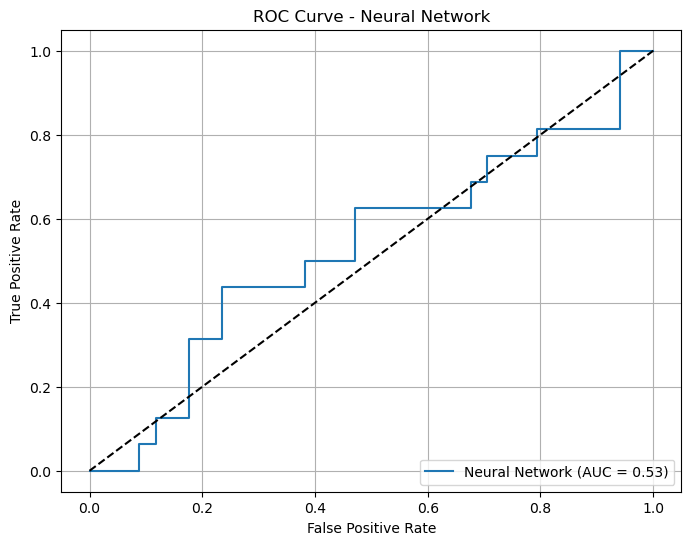

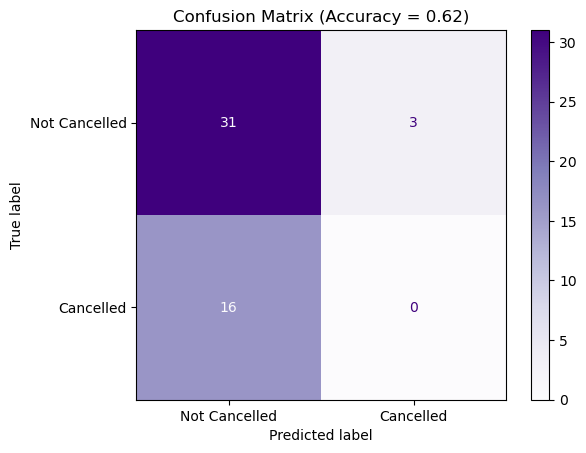

In [14]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# # Step 1: Split again (to ensure clean split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Step 3: Define the neural network
# model = Sequential([
#     Dense(64, input_dim=X_train.shape[1], activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')  # Output layer for binary classification
# ])

# # Step 4: Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# # Step 5: Train the model
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=0)

# # Step 6: Evaluate the model
# loss, accuracy, auc_score = model.evaluate(X_test_scaled, y_test, verbose=0)

# # Step 7: Generate ROC and Confusion Matrix
# y_prob_nn = model.predict(X_test_scaled).ravel()
# y_pred_nn = (y_prob_nn > 0.5).astype(int)

# # ROC
# fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
# roc_auc_nn = auc(fpr_nn, tpr_nn)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Neural Network")
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

# # Confusion Matrix
# conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
# ConfusionMatrixDisplay(conf_matrix_nn, display_labels=["Not Cancelled", "Cancelled"]).plot(cmap="Purples")
# plt.title(f"Confusion Matrix (Accuracy = {accuracy:.2f})")
# plt.show()


C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


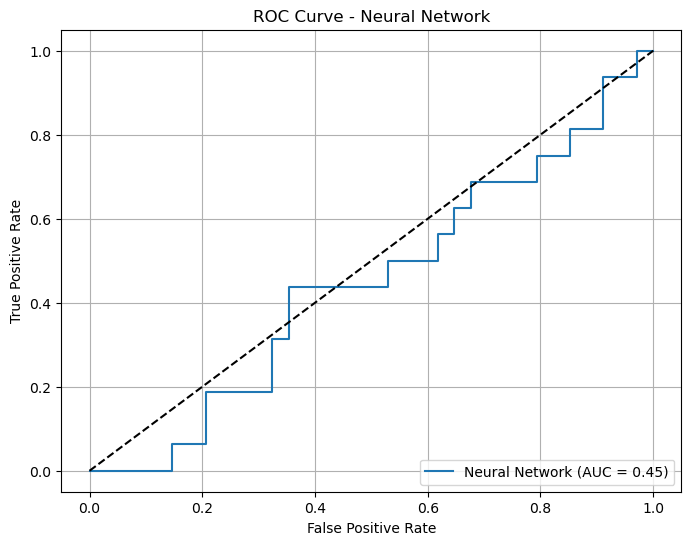

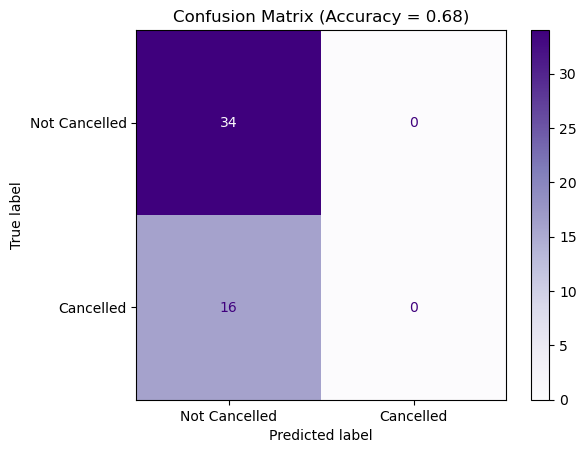

In [15]:
# # Re-import necessary libraries after kernel reset
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # Reload dataset
# file_path = "amazon_sales_data 2025.xlsx"
# df = pd.read_excel(file_path)

# # Preprocess
# df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)
# df['Date Reworked'] = pd.to_datetime(df['Date Reworked'])
# df['Order_Month'] = df['Date Reworked'].dt.month
# df['Order_Weekday'] = df['Date Reworked'].dt.weekday
# df_cleaned = df.drop(columns=['Order ID', 'Date', 'Date Reworked', 'Customer Name'])
# df_encoded = pd.get_dummies(df_cleaned, drop_first=True)
# X = df_encoded.drop(columns=['Status'])
# y = df_encoded['Status']

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define Neural Network
# model = Sequential([
#     Dense(64, input_dim=X_train.shape[1], activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# # Train the model
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=0)

# # Evaluate the model
# loss, accuracy, auc_score = model.evaluate(X_test_scaled, y_test, verbose=0)

# # Predict
# y_prob_nn = model.predict(X_test_scaled).ravel()
# y_pred_nn = (y_prob_nn > 0.5).astype(int)

# # ROC Curve
# fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
# roc_auc_nn = auc(fpr_nn, tpr_nn)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Neural Network")
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

# # Confusion Matrix
# conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
# ConfusionMatrixDisplay(conf_matrix_nn, display_labels=["Not Cancelled", "Cancelled"]).plot(cmap="Purples")
# plt.title(f"Confusion Matrix (Accuracy = {accuracy:.2f})")
# plt.show()


In [16]:
# Ignore the last one

In [17]:
# Not satisfied with the confusion Matrix

In [18]:
# trying with XGBClassifier 

In [19]:
# Had to install pip as it is not working. 
!pip install xgboost


In [20]:
# Re-import libraries after kernel reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
)

# Re-load and preprocess data
file_path = "amazon_sales_data 2025.xlsx"
df = pd.read_excel(file_path)

# Binary classification target: Status
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)

# Extract date features
df['Date Reworked'] = pd.to_datetime(df['Date Reworked'])
df['Order_Month'] = df['Date Reworked'].dt.month
df['Order_Weekday'] = df['Date Reworked'].dt.weekday

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Order ID', 'Date', 'Date Reworked', 'Customer Name'])

# One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Features and target
X = df_encoded.drop(columns=['Status'])
y = df_encoded['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# I had to install it again. It was not working on my end
# If needed uncomment the last line
# !pip install xgboost


C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:49:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


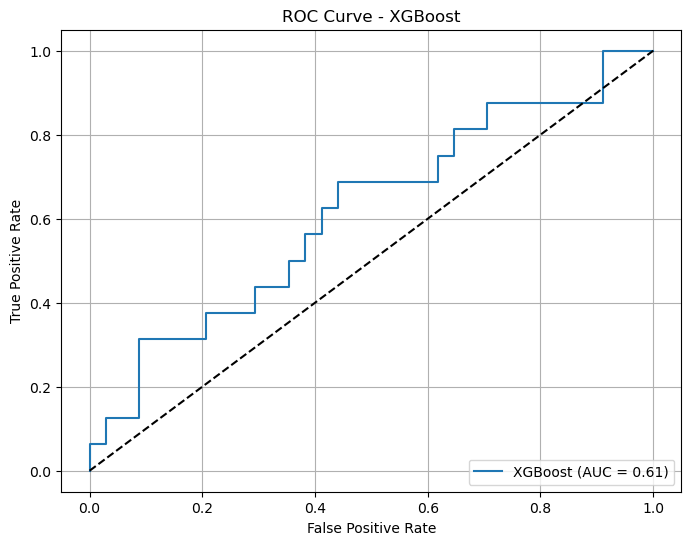

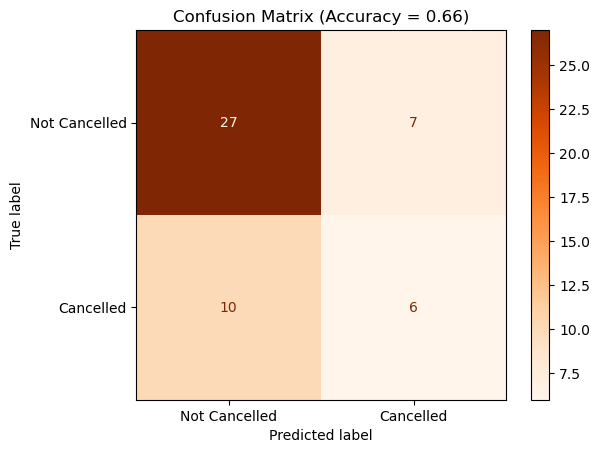

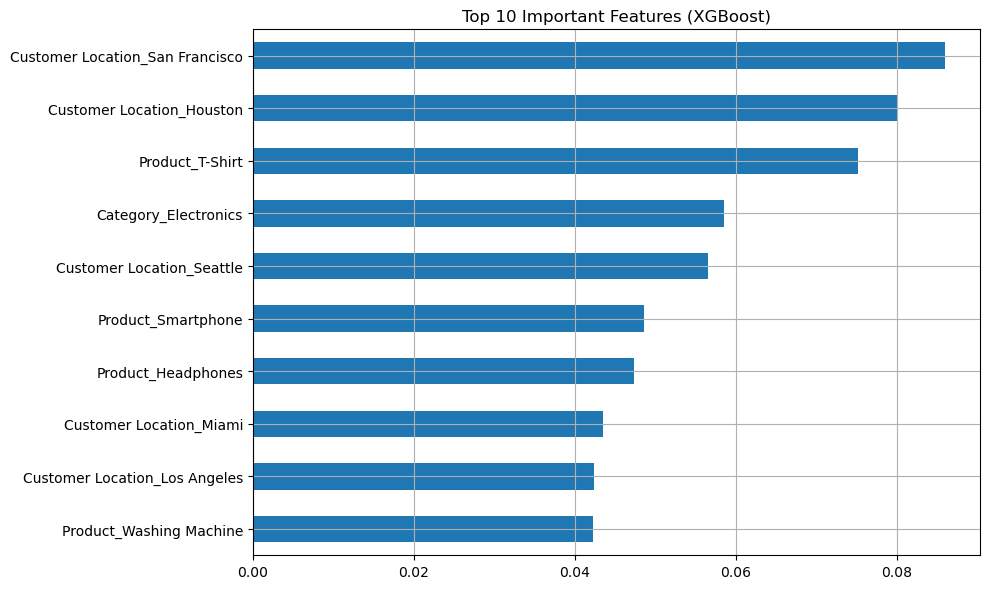

In [21]:
# Now that xgboost is installed, import and train the XGBClassifier
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=["Not Cancelled", "Cancelled"]).plot(cmap="Oranges")
plt.title(f"Confusion Matrix (Accuracy = {accuracy_xgb:.2f})")
plt.show()

# Feature Importance
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features_xgb = importances_xgb.head(10)

plt.figure(figsize=(10, 6))
top_features_xgb.plot(kind='barh')
plt.title("Top 10 Important Features (XGBoost)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Accuracy tester

In [31]:
# Cross-validation for Accuracy
xgb_scores = cross_val_score(xgb_model, X, y, cv=5)
print(f"XGBoost CV Accuracy Scores: {xgb_scores}")
print(f"Mean Accuracy: {xgb_scores.mean():.3f}, Std Dev: {xgb_scores.std():.3f}")

# Cross-validation for AUC
xgb_auc_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print(f"XGBoost CV AUC Scores: {xgb_auc_scores}")
print(f"Mean AUC: {xgb_auc_scores.mean():.3f}, Std Dev: {xgb_auc_scores.std():.3f}")


C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 

XGBoost CV Accuracy Scores: [0.66 0.52 0.66 0.64 0.7 ]
Mean Accuracy: 0.636, Std Dev: 0.061
XGBoost CV AUC Scores: [0.64154412 0.48161765 0.57333333 0.53714286 0.71238095]
Mean AUC: 0.589, Std Dev: 0.081


C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\im4284hw\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
